### Name: Rushikesh Jyoti
### Division: A
### Roll no: 27
### SRN: 201901139

The dataset used is *__iris dataset__* for flowers

In [62]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plot
from sklearn.datasets import load_iris

In [63]:
iris_df = load_iris()
original_df = pd.DataFrame(iris_df['data'], columns=iris_df.feature_names)
original_df['species'] = iris_df.target
original_df.head()

df = original_df
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [64]:
def fig(width, height):
    plot.figure(1, (width, height))

sb.set(font_scale = 1.8)

# Correlation Heatmap

<AxesSubplot:>

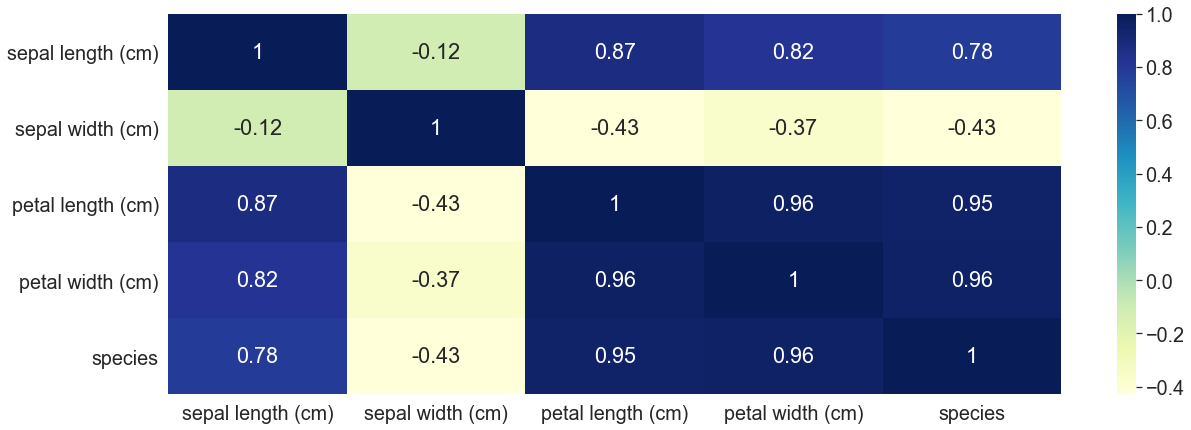

In [65]:
fig(20, 7)
sb.heatmap(df.corr(), cmap='YlGnBu', annot=True)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [67]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int32
dtype: object

# Splitting the dataset
80% Train

20% Test

In [68]:
xtrain, xtest, ytrain, ytest = train_test_split(df.drop(['species'], axis=1), df['species'], train_size=0.8)

print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)
# ytrain

(120, 4) (30, 4) (120,) (30,)


# Logistic Regression Model

In [69]:
lg_model = LogisticRegression().fit(xtrain, ytrain)
lg_predictions = lg_model.predict(xtest)

# Deicision Tree Model

In [70]:
dt_model = DecisionTreeClassifier().fit(xtrain, ytrain)
dt_predictions = dt_model.predict(xtest)

In [71]:
def errors(real, predicted, title):
    print(title.center(40, '='))
    print("Root Mean Squared Error:", metrics.mean_squared_error(real, predicted))
    print("Mean Squared Error:", metrics.mean_squared_error(real, predicted, squared=False))
    print("Mean Absolute Error:", metrics.mean_absolute_error(real, predicted))
    print("R2:", metrics.r2_score(real, predicted))
    

# Metrics

## Logistic Regression

In [72]:
print(metrics.classification_report(ytest, lg_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.90      1.00      0.95         9
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## Decision Tree 

In [73]:
print(metrics.classification_report(ytest, dt_predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Errors

In [74]:
errors(ytest, lg_predictions, " Logistic Regression ")
errors(ytest, dt_predictions, " Decision Tree ")

========= Logistic Regression ==========
Root Mean Squared Error: 0.03333333333333333
Mean Squared Error: 0.18257418583505536
Mean Absolute Error: 0.03333333333333333
R2: 0.9516908212560387
============ Decision Tree =============
Root Mean Squared Error: 0.0
Mean Squared Error: 0.0
Mean Absolute Error: 0.0
R2: 1.0
